In [1]:
import plotly.express as px

In [2]:
fig = px.scatter(x=[0,1 ,2 ,3, 4], y=[0, 1, 4, 9, 16])
fig.show()

In [3]:
df = px.data.iris() # iris is a Pandas DataFrame
fig = px.scatter(df, x='sepal_width', y='sepal_length')
fig.show()

In [4]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="petal_length", hover_data=['petal_width'])
fig.show()

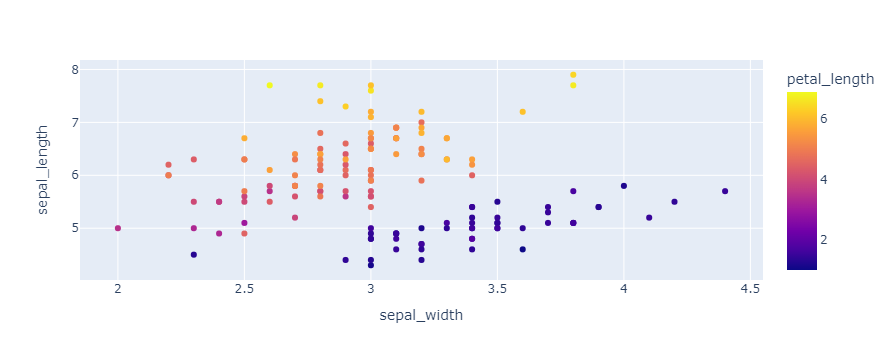

In [5]:
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='petal_length')
fig.show()

Map a column to a `symbol` argument

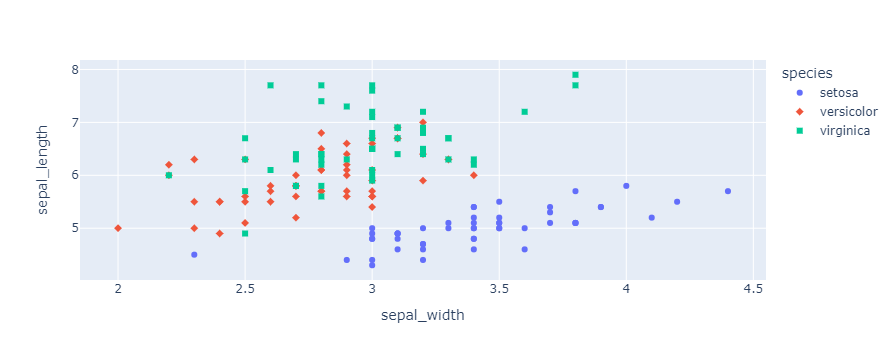

In [6]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", symbol="species")
fig.show()

In [7]:
import random
from functools import partial
import numpy as np
import pandas as pd
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import fitstools
from pathlib import PurePath
import glob
from balltracking import mballtrack as mblt

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
DTYPE = np.float32

In [8]:
# Data prepped by COR2_tracking_prep.ipynb
datadir = PurePath('C:\Data\STEREO\L7tum\prep_fits')
outputdir = PurePath('C:\Data\STEREO\L7tum\\figures')
datafiles = sorted(glob.glob(str(PurePath(datadir, '*.fits'))))
nfiles = len(datafiles)
nframes = 10
fov = np.s_[0:659, 0:600]

In [9]:
samples = np.array([np.abs(fitstools.fitsread(datafiles[i], cube=False, astropy=True))[fov] for i in range(nframes)])
samples.shape

(10, 659, 600)

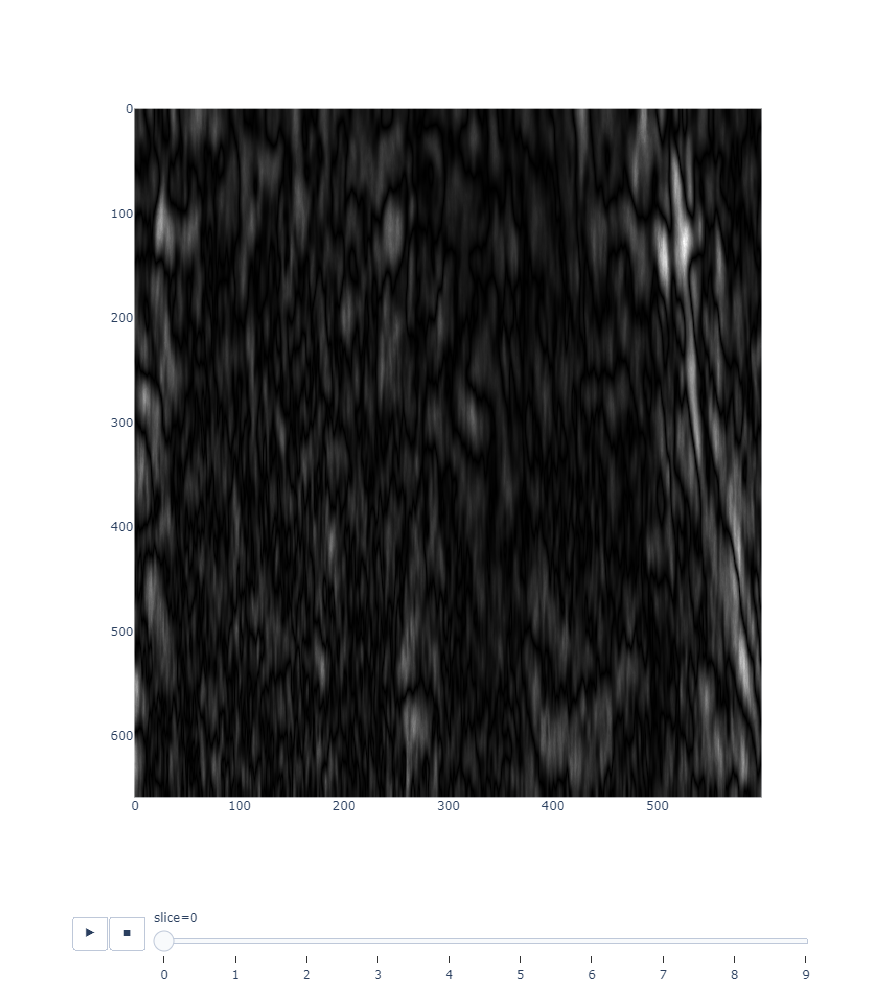

In [11]:
fig = px.imshow(samples, animation_frame=0, binary_string=True, labels=dict(animation_frame="slice"), width=1000, height=1000)
fig.show()

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

In [ ]:
df = px.data.iris()
app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Graph(id="scatter-plot"),
    html.P("Petal Width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1, marks={0: '0', 2.5:'2.5'},
        value=[0.5, 2]
    ),
])

@app.callback(
    Output("scatter-plot", "figure"),
    [Input("range-slider", "value")])
def update_bar_chart(slider_range):
    low, high = slider_range
    mask = (df['petal_width'] > low) & (df['petal_width'] < high)
    fig = px.scatter(
        df[mask], x="sepal_width", y="sepal_length", color="species", size="petal_length", hover_data=['petal_width'])
    return fig

app.run_server(debug=True)